In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Data preprocessing

1. Reading the dataset, here is the data from 2014 jan 1 to 2023 dec 31
2. Getting the basic info about the dataset like its shape, mean, std and etc.
3. Reformatting values to float from str
4. Visualizing what we have at this point of research

In [5]:
df = pd.read_csv("/Users/zafiraibraeva/Code/uni coding/thesis/thesis_code/thesis/data/merged_air_quality_data.csv")
df.head()

,Date,CO,NO2,NOx,O3,PM10,PM2.5,SO2
0,2021-01-01 00:00:00,459.0,7.5,9.9,"41,2",12.0,17.0,1.3
1,2021-01-02 00:00:00,535.0,15.2,19.5,"37,1",16.0,13.0,1.6
2,2021-01-03 00:00:00,551.0,13.7,17.0,"38,9",16.0,17.0,1.4
3,2021-01-04 00:00:00,649.0,28.2,46.6,"17,8",20.0,18.0,1.3
4,2021-01-05 00:00:00,504.0,13.0,16.9,"35,3",12.0,16.0,1.0


In [6]:
df.shape

(3652, 8)

In [7]:
df.describe()

,CO,NO2,NOx,PM10,PM2.5,SO2
count,3566.000000,3508.000000,3508.000000,3592.000000,1063.000000,3409.000000
mean,475.779585,18.996636,29.736716,23.182906,15.878645,3.344148
std,271.040069,10.682934,24.075101,14.308948,10.477280,1.957069
min,68.000000,3.500000,5.600000,4.000000,4.000000,0.300000
25%,294.000000,11.400000,14.900000,14.000000,9.000000,2.200000
50%,399.500000,16.400000,22.100000,19.500000,13.000000,3.000000
75%,578.000000,23.900000,35.200000,28.000000,19.000000,4.100000
max,3022.000000,94.600000,330.100000,186.000000,79.000000,19.900000


In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.set_index('Date', inplace=True)
df

,CO,NO2,NOx,O3,PM10,PM2.5,SO2,YearMonth,Year,Month
Date,,,,,,,,,,
2021-01-01,459.0,7.5,9.9,"41,2",12.0,17.0,1.3,2021-01,2021,1
2021-01-02,535.0,15.2,19.5,"37,1",16.0,13.0,1.6,2021-01,2021,1
2021-01-03,551.0,13.7,17.0,"38,9",16.0,17.0,1.4,2021-01,2021,1
2021-01-04,649.0,28.2,46.6,"17,8",20.0,18.0,1.3,2021-01,2021,1
2021-01-05,504.0,13.0,16.9,"35,3",12.0,16.0,1.0,2021-01,2021,1
...,...,...,...,...,...,...,...,...,...,...
2017-12-27,396.0,12.6,15.5,"43,1",16.0,NaN,9.3,2017-12,2017,12
2017-12-28,323.0,19.3,23.4,"40,1",12.0,NaN,3.9,2017-12,2017,12
2017-12-29,289.0,10.1,14.2,"33,8",9.0,NaN,1.9,2017-12,2017,12


In [9]:
df_2023 = df[df['Year'] == 2023]
df_2023.describe()

,CO,NO2,NOx,PM10,PM2.5,SO2,Year,Month
count,348.000000,330.000000,330.000000,360.000000,353.000000,230.000000,365.0,365.000000
mean,481.491379,12.134848,18.739091,17.513889,13.773371,1.331739,2023.0,6.526027
std,229.227301,5.797770,12.912573,8.173592,8.884657,0.642111,0.0,3.452584
min,85.000000,3.500000,5.600000,4.000000,4.000000,0.300000,2023.0,1.000000
25%,323.750000,7.925000,11.200000,12.000000,9.000000,0.925000,2023.0,4.000000
50%,444.000000,10.800000,14.950000,16.000000,11.000000,1.250000,2023.0,7.000000
75%,566.250000,14.600000,20.300000,21.000000,15.000000,1.600000,2023.0,10.000000
max,1457.000000,36.300000,87.200000,59.000000,78.000000,4.700000,2023.0,12.000000


In [10]:
non_group_cols = [col for col in df.columns if col not in ['YearMonth', 'Year', 'Month']]

monthly_stats = df.groupby('YearMonth')[non_group_cols].apply(lambda x: x.describe())
print("Monthly statistics: ")
monthly_stats

Monthly statistics: 


CO        NO2        NOx       PM10  PM2.5  \
YearMonth                                                              
2014-01   count    31.000000  31.000000  31.000000  31.000000    0.0   
          mean   1011.483871  25.132258  39.561290  35.129032    NaN   
          std     205.584836   9.860473  20.831413  16.216744    NaN   
          min     553.000000  11.300000  14.800000  12.000000    NaN   
          25%     883.500000  19.350000  26.550000  23.000000    NaN   
...                      ...        ...        ...        ...    ...   
2023-12   min     685.000000  10.000000  13.200000   4.000000    6.0   
          25%     831.000000  15.050000  19.100000  13.000000   13.0   
          50%     921.000000  16.900000  26.400000  19.000000   16.0   
          75%    1060.500000  20.050000  33.200000  24.000000   23.0   
          max    1457.000000  33.500000  65.400000  49.000000   45.0   

                       SO2  
YearMonth                   
2014-01   count  14.000000  
          mean   10.792857  
          std     2.509203  
          min     6.500000  
          25%     9.325000  
...                    ...  
2023-12   min     1.300000  
          25%     1.500000  
          50%     1.700000  
          75%     1.900000  
          max     2.900000  

[960 rows x 6 columns]

In [11]:
nans = df.groupby('Year')[non_group_cols].apply(lambda x: x.isna().sum())
print("NaN values for each year: ")
nans

NaN values for each year: 


,CO,NO2,NOx,O3,PM10,PM2.5,SO2
Year,,,,,,,
2014,13,7,7,42,7,365,30
2015,5,4,4,11,6,365,4
2016,6,6,6,6,3,366,4
2017,5,66,66,64,2,365,2
2018,3,7,7,7,1,365,3
2019,7,2,2,2,27,365,9
2020,17,2,2,6,6,366,2
2021,0,9,9,4,3,9,0
2022,13,6,6,0,0,11,54


Since for 6 years there was no data for PM2.5, PM2.5 is dropped.

In [12]:
df.drop('PM2.5', axis=1, inplace=True)
df.drop('YearMonth', axis=1, inplace=True)

In [13]:
for col in df.columns:
    df[col] = df[col].astype(str).str.replace(",", ".")
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.head(8)

,CO,NO2,NOx,O3,PM10,SO2,Year,Month
Date,,,,,,,,
2021-01-01,459.0,7.5,9.9,41.2,12.0,1.3,2021,1
2021-01-02,535.0,15.2,19.5,37.1,16.0,1.6,2021,1
2021-01-03,551.0,13.7,17.0,38.9,16.0,1.4,2021,1
2021-01-04,649.0,28.2,46.6,17.8,20.0,1.3,2021,1
2021-01-05,504.0,13.0,16.9,35.3,12.0,1.0,2021,1
2021-01-06,547.0,15.9,20.5,37.4,15.0,1.8,2021,1
2021-01-07,578.0,13.4,18.8,31.3,12.0,1.2,2021,1
2021-01-08,838.0,28.7,68.1,5.5,23.0,1.3,2021,1


In [14]:
duplicate = df[df.duplicated()]
print("Duplicate data: ")
print(duplicate)

Duplicate data: 
            CO  NO2  NOx  O3  PM10  SO2  Year  Month
Date                                                
2014-04-03 NaN  NaN  NaN NaN   NaN  NaN  2014      4
2014-10-31 NaN  NaN  NaN NaN   NaN  NaN  2014     10
2023-05-22 NaN  NaN  NaN NaN   NaN  NaN  2023      5
2015-06-18 NaN  NaN  NaN NaN   NaN  NaN  2015      6


In [15]:
def scatter_pollutants(df):
    num_pollutants = len(df.columns)
    
    nrows = (num_pollutants + 1) // 2 
    fig, axes = plt.subplots(nrows, 2, figsize=(12, nrows * 4)) 
    
    axes = axes.flatten()
    
    for i, column in enumerate(df.columns):
        axes[i].scatter(range(len(df[column])), df[column], alpha=0.7, color='b', s=50)
        axes[i].set_title(f'Scatter Plot of {column} Values')
        axes[i].set_ylabel(column)
    
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

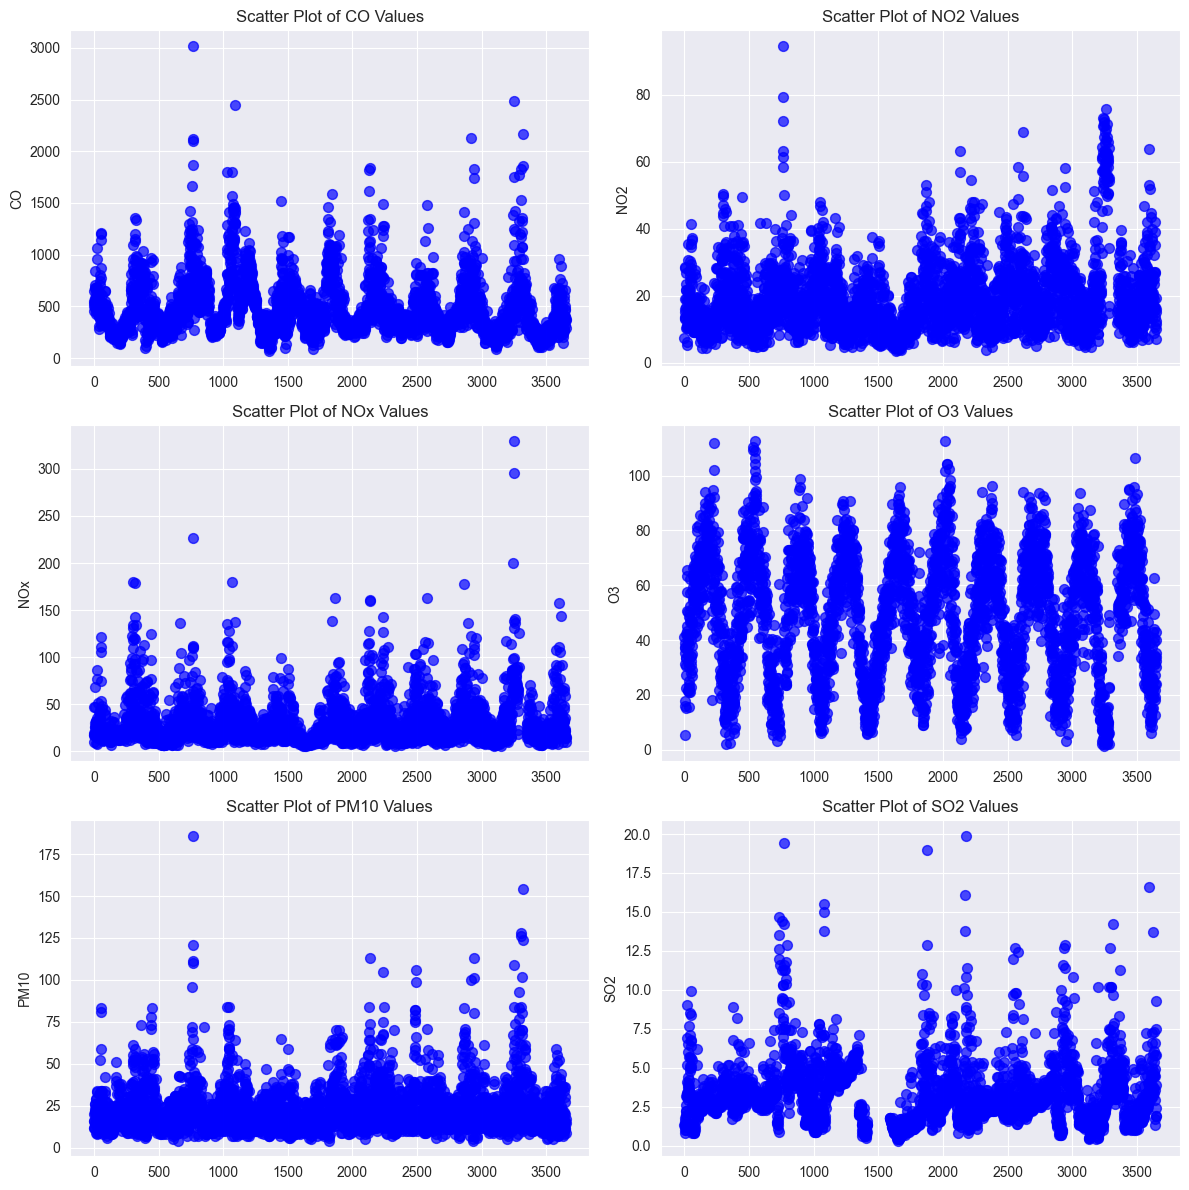

In [16]:
df_subset = df.drop(['Year', 'Month'], axis=1)
scatter_pollutants(df_subset)

## Imputation 

For imputation of NaN values, after researching I found out that RandomForest is the most efficient technique for air quality data.

In [17]:
from sklearn.impute import SimpleImputer

df_imputed = df.copy()

def rf_imputation(df):
    for col in df_imputed.columns:
        if df_imputed[col].isna().sum() > 0:
            train_data = df_imputed[df_imputed[col].notna()]
            test_data = df_imputed[df_imputed[col].isna()]
            
            X_train = train_data.drop(columns=[col])
            y_train = train_data[col]
            
            X_test = test_data.drop(columns=[col])
            
            imputer = SimpleImputer(strategy='mean')
            X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
            X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
            
            if X_train.shape[1] > 0 and not X_test.empty:
                scaler = StandardScaler()
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)
                
                rf_model = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
                rf_model.fit(X_train_scaled, y_train)
                
                predictions = rf_model.predict(X_test_scaled)
                df_imputed.loc[df[col].isna(), col] = predictions

    print("Remaining null values: ")
    print(df_imputed.isna().sum())
    
    return df_imputed

rf_imputation(df_imputed)

df_imputed.head(5)

Remaining null values: 
CO       0
NO2      0
NOx      0
O3       0
PM10     0
SO2      0
Year     0
Month    0
dtype: int64


,CO,NO2,NOx,O3,PM10,SO2,Year,Month
Date,,,,,,,,
2021-01-01,459.0,7.5,9.9,41.2,12.0,1.3,2021,1
2021-01-02,535.0,15.2,19.5,37.1,16.0,1.6,2021,1
2021-01-03,551.0,13.7,17.0,38.9,16.0,1.4,2021,1
2021-01-04,649.0,28.2,46.6,17.8,20.0,1.3,2021,1
2021-01-05,504.0,13.0,16.9,35.3,12.0,1.0,2021,1


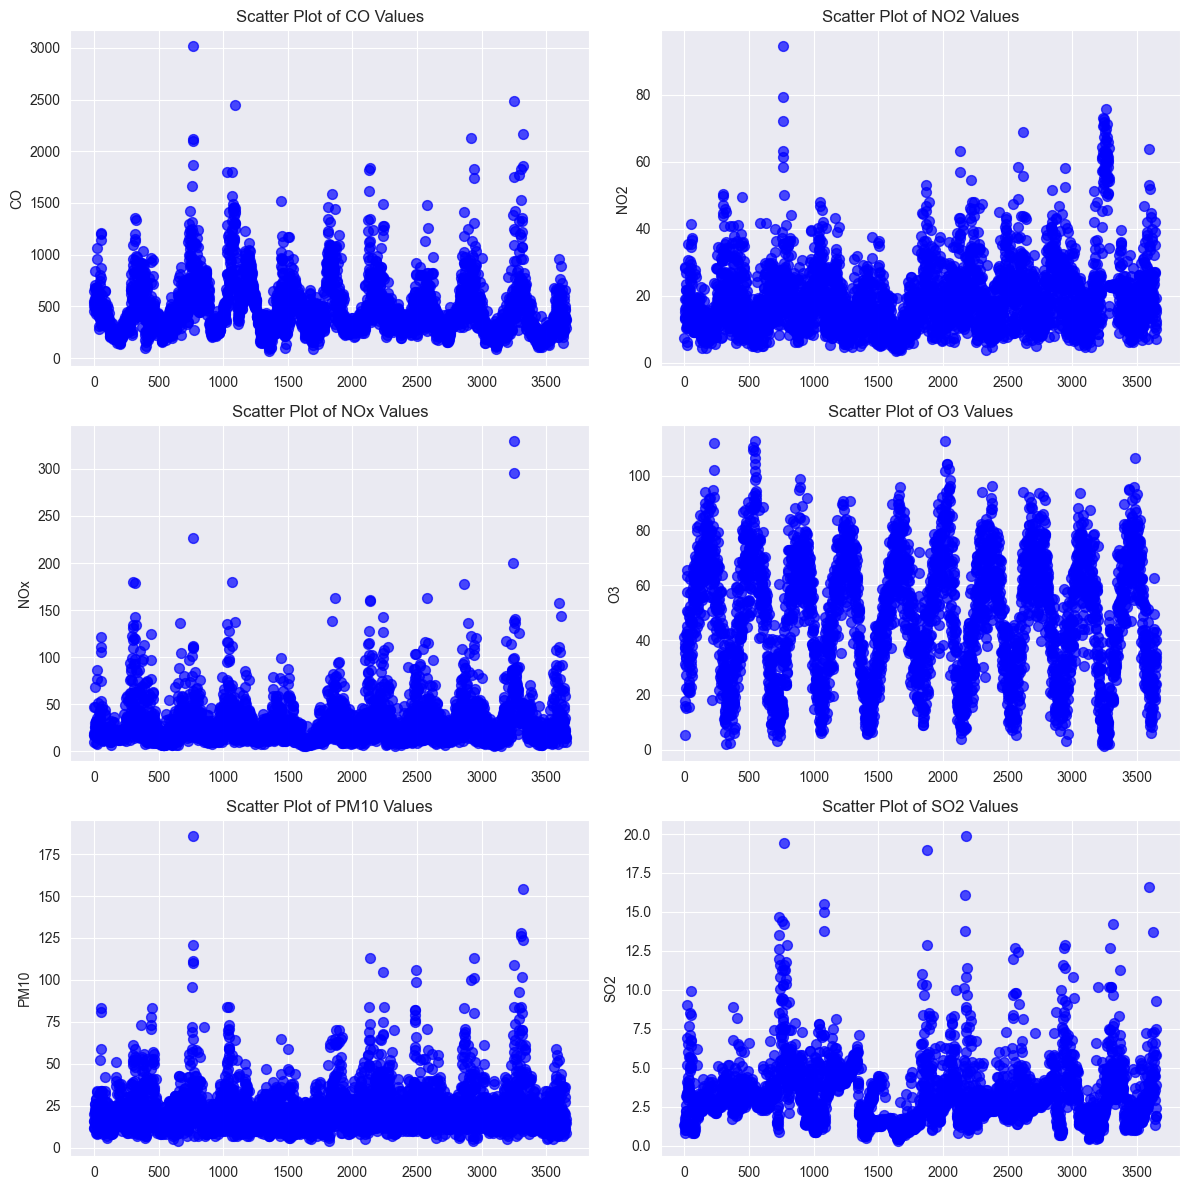

In [18]:
df_subset2 = df_imputed.drop(['Year', 'Month'], axis=1)
scatter_pollutants(df_subset2)

In order to check how good RandomForest works, we will randomly remove some values, impute them with RF and then check results with the real ones. As well as calculating the MAE and RMSE for each pollutant.

In [19]:
for col in df_subset2.columns:
    np.random.seed(42)
    mask = np.random.rand(len(df_subset2)) < 0.1
    original_values = df_subset2.loc[mask, col].copy()
    df_subset2.loc[mask, col] = np.nan
    
    df_subset2 = rf_imputation(df_subset2)
    
    imputed_val = df_subset2.loc[mask, col]
    
    mae = mean_absolute_error(original_values, imputed_val)
    rmse = np.sqrt(mean_squared_error(original_values, imputed_val))
    
    print(f"\nEvaluation for {col}:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Remaining null values: 
CO       0
NO2      0
NOx      0
O3       0
PM10     0
SO2      0
Year     0
Month    0
dtype: int64

Evaluation for CO:
Mean Absolute Error (MAE): 0.00
Root Mean Squared Error (RMSE): 0.00
Remaining null values: 
CO       0
NO2      0
NOx      0
O3       0
PM10     0
SO2      0
Year     0
Month    0
dtype: int64

Evaluation for NO2:
Mean Absolute Error (MAE): 1.72
Root Mean Squared Error (RMSE): 2.99
Remaining null values: 
CO       0
NO2      0
NOx      0
O3       0
PM10     0
SO2      0
Year     0
Month    0
dtype: int64

Evaluation for NOx:
Mean Absolute Error (MAE): 2.93
Root Mean Squared Error (RMSE): 8.57
Remaining null values: 
CO       0
NO2      0
NOx      0
O3       0
PM10     0
SO2      0
Year     0
Month    0
dtype: int64

Evaluation for O3:
Mean Absolute Error (MAE): 6.81
Root Mean Squared Error (RMSE): 8.67
Remaining null values: 
CO       0
NO2      0
NOx      0
O3       0
PM10     0
SO2      0
Year     0
Month    0
dtype: int64

Evaluation for P

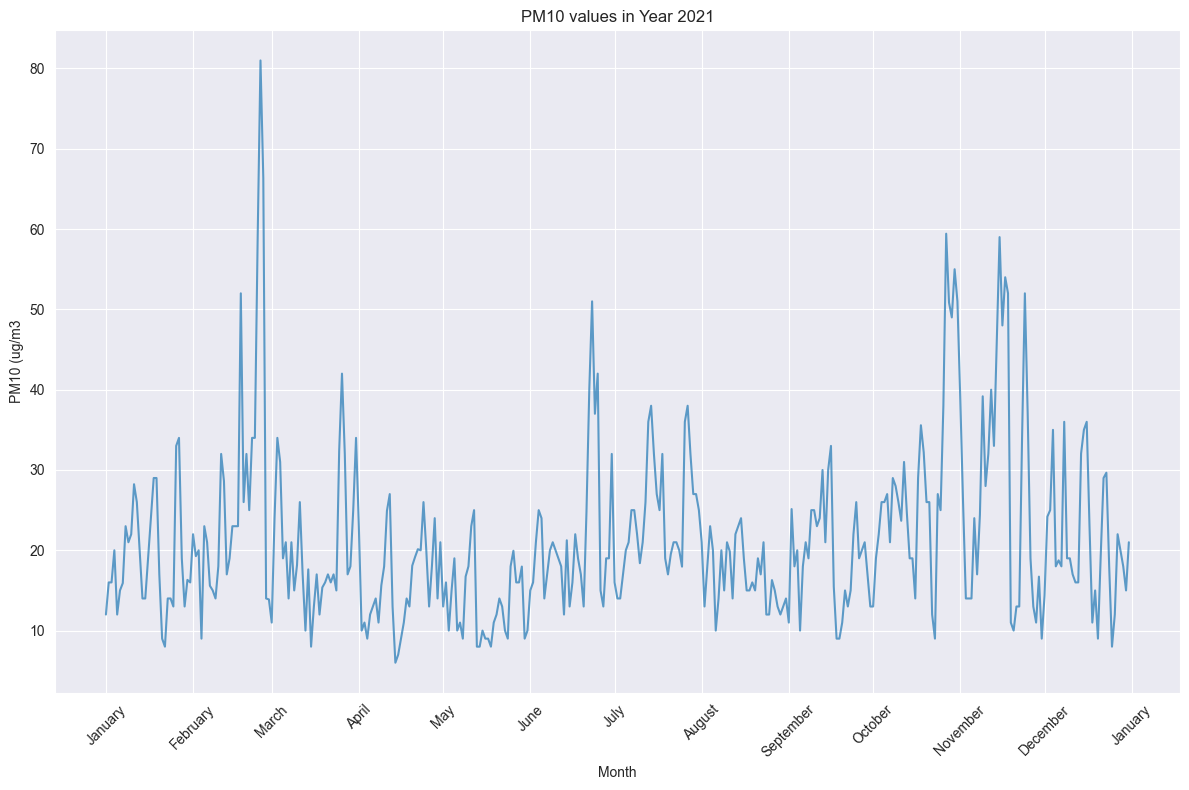

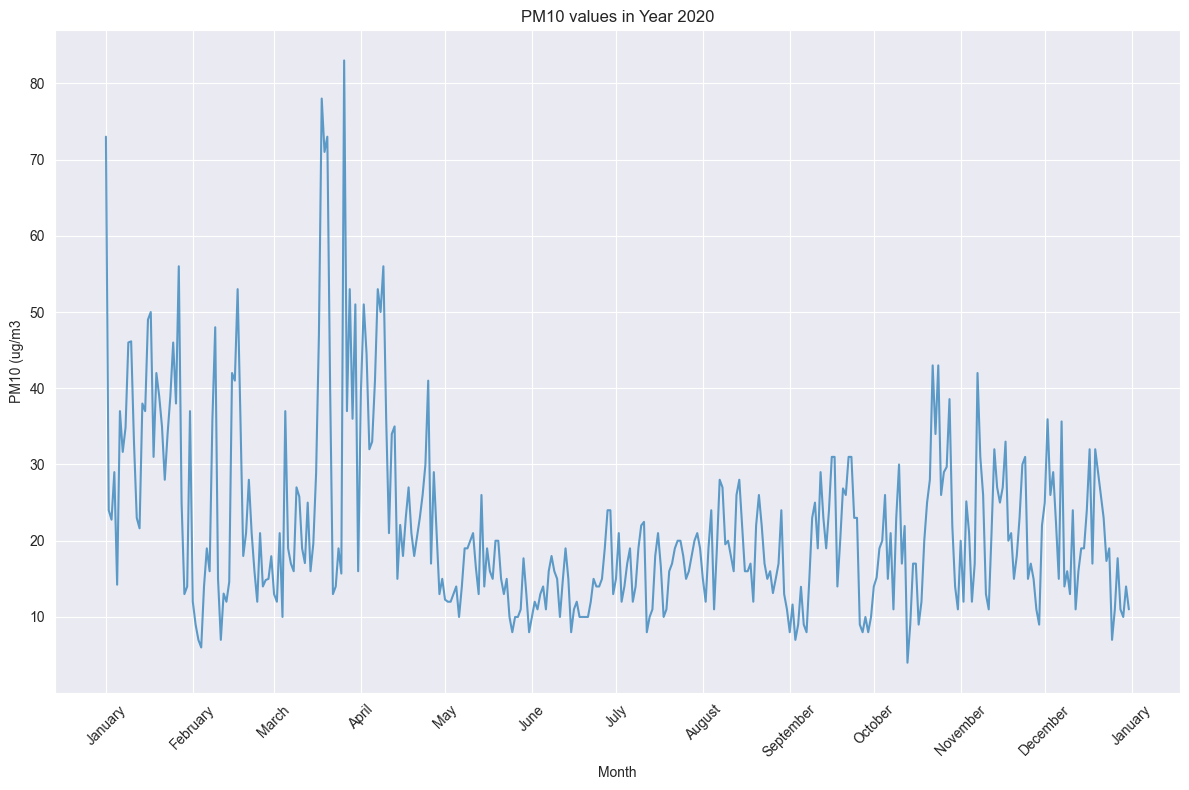

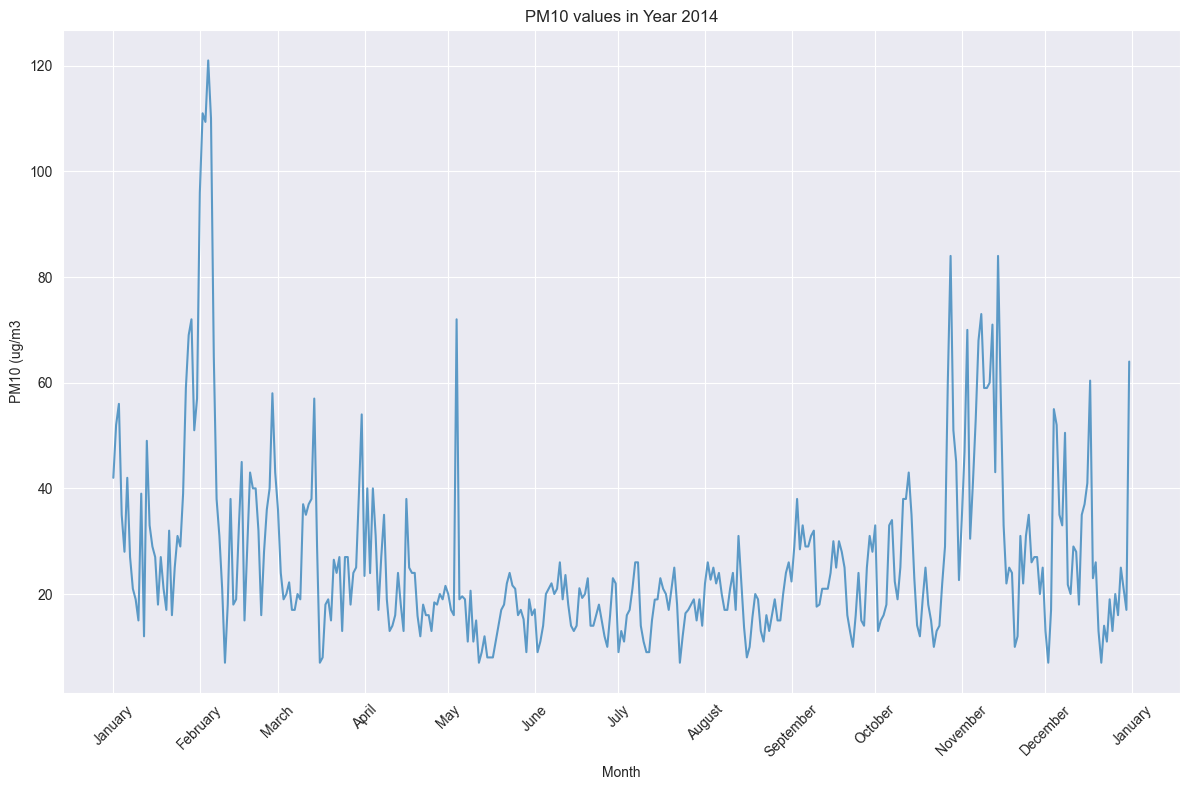

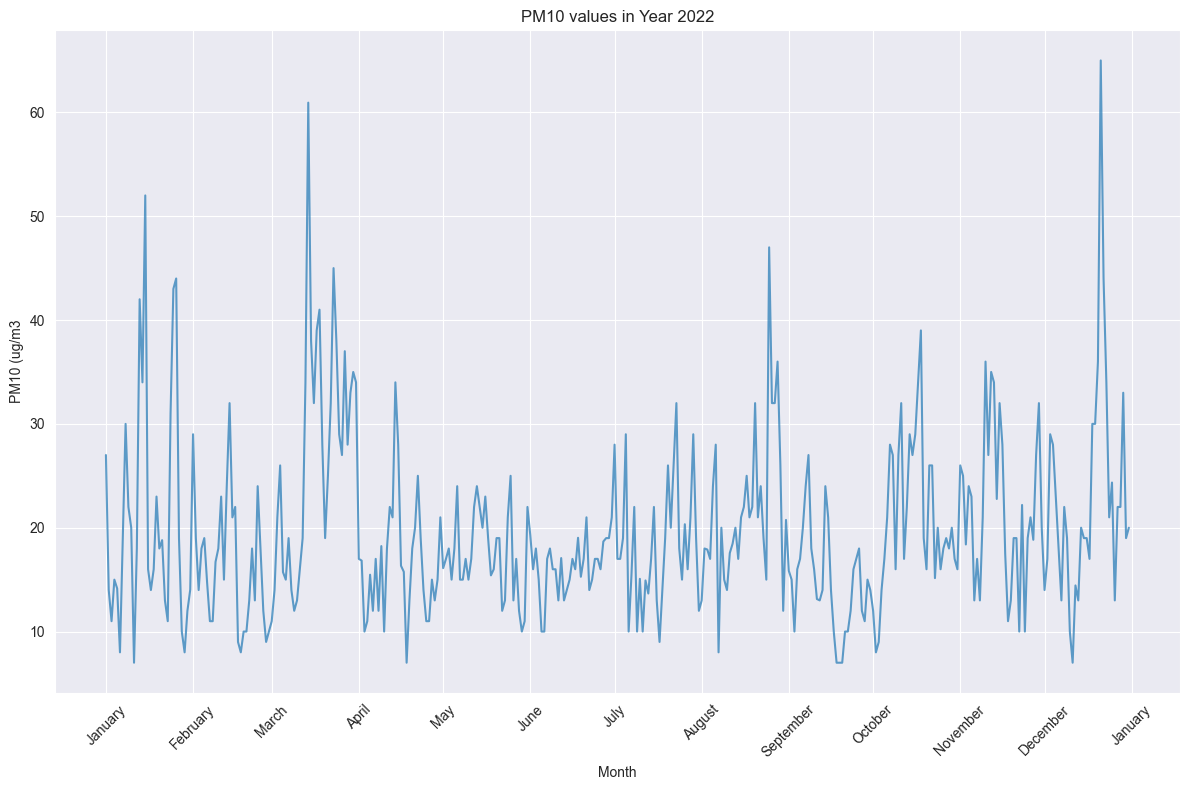

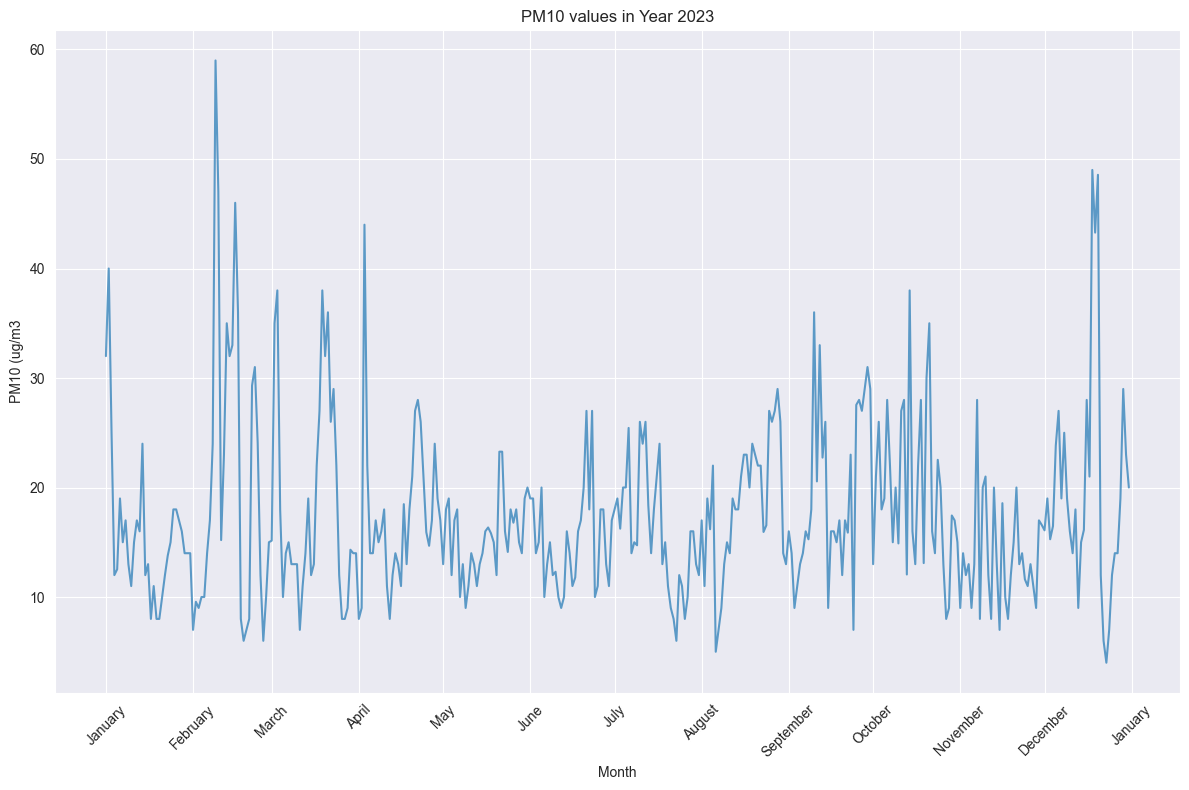

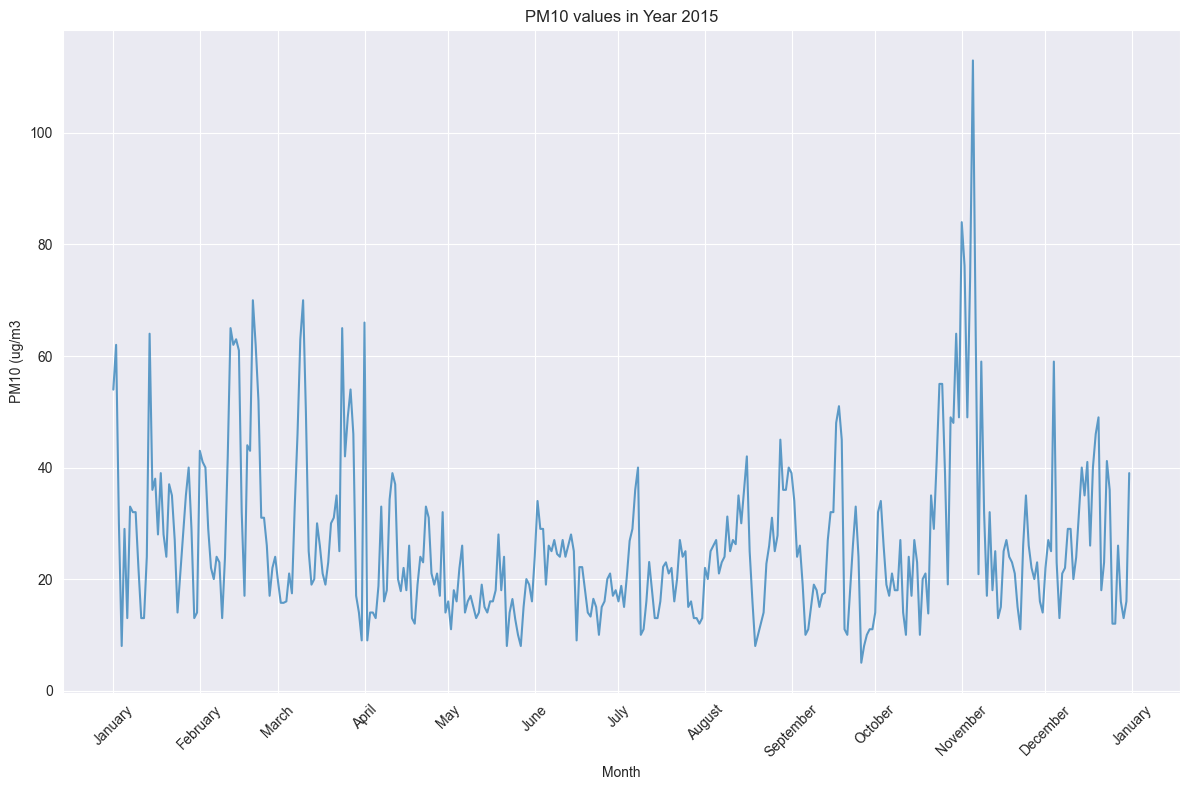

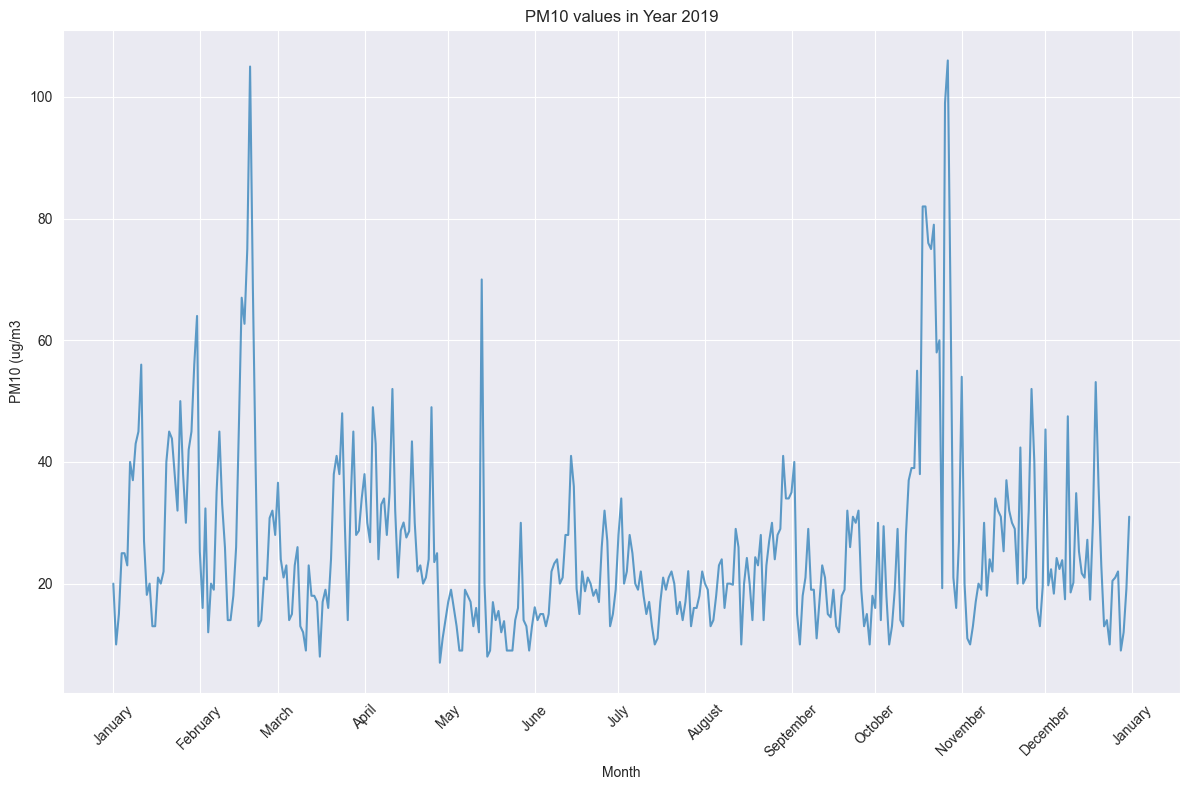

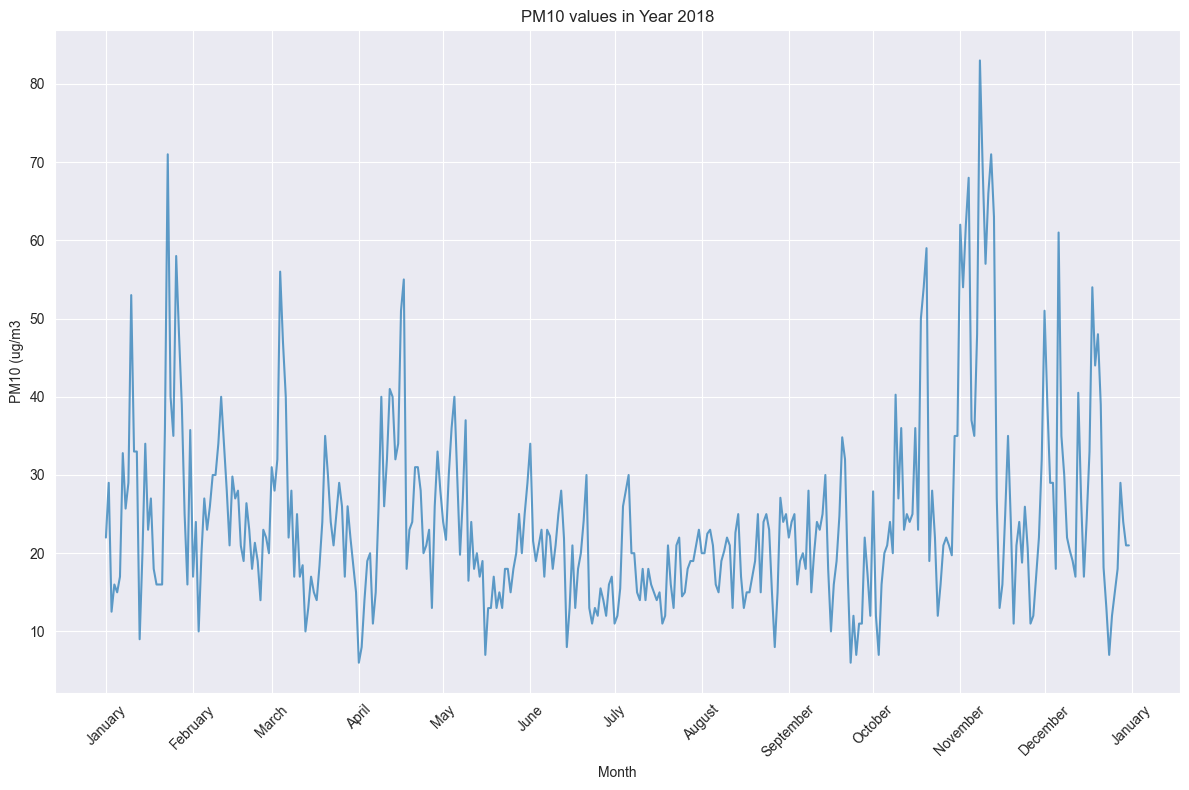

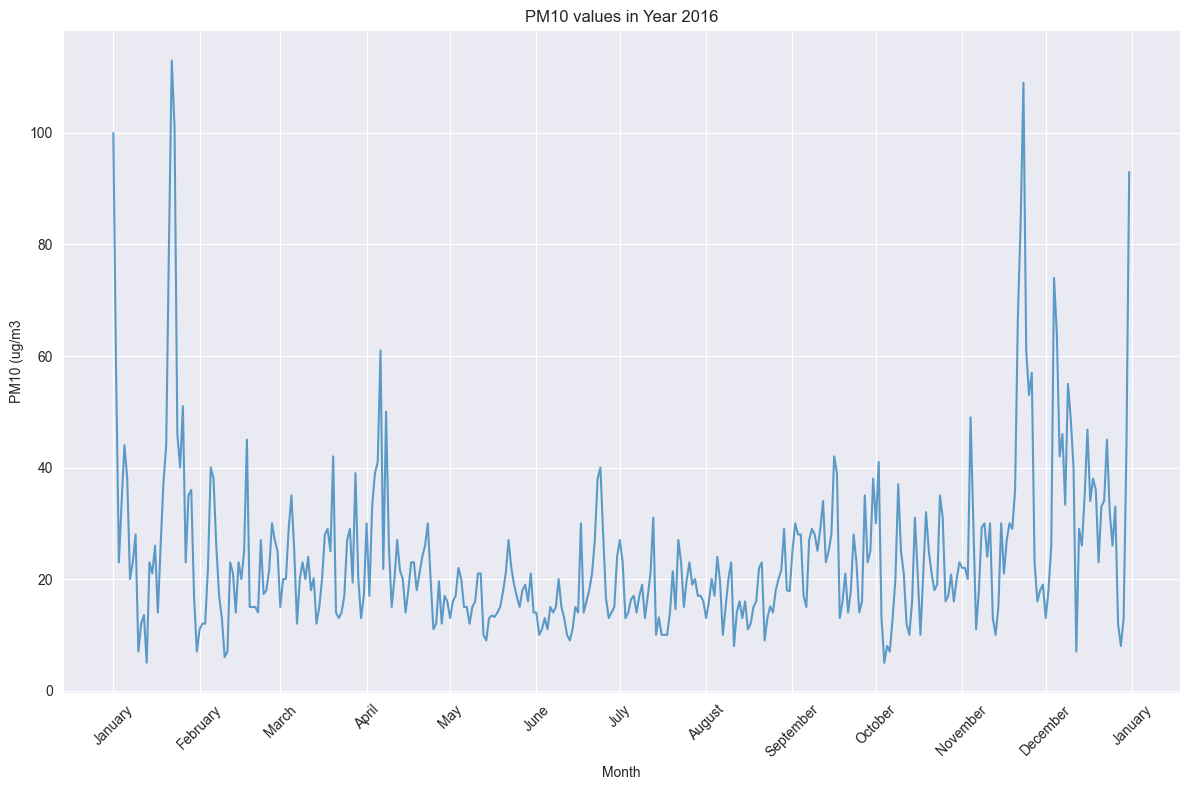

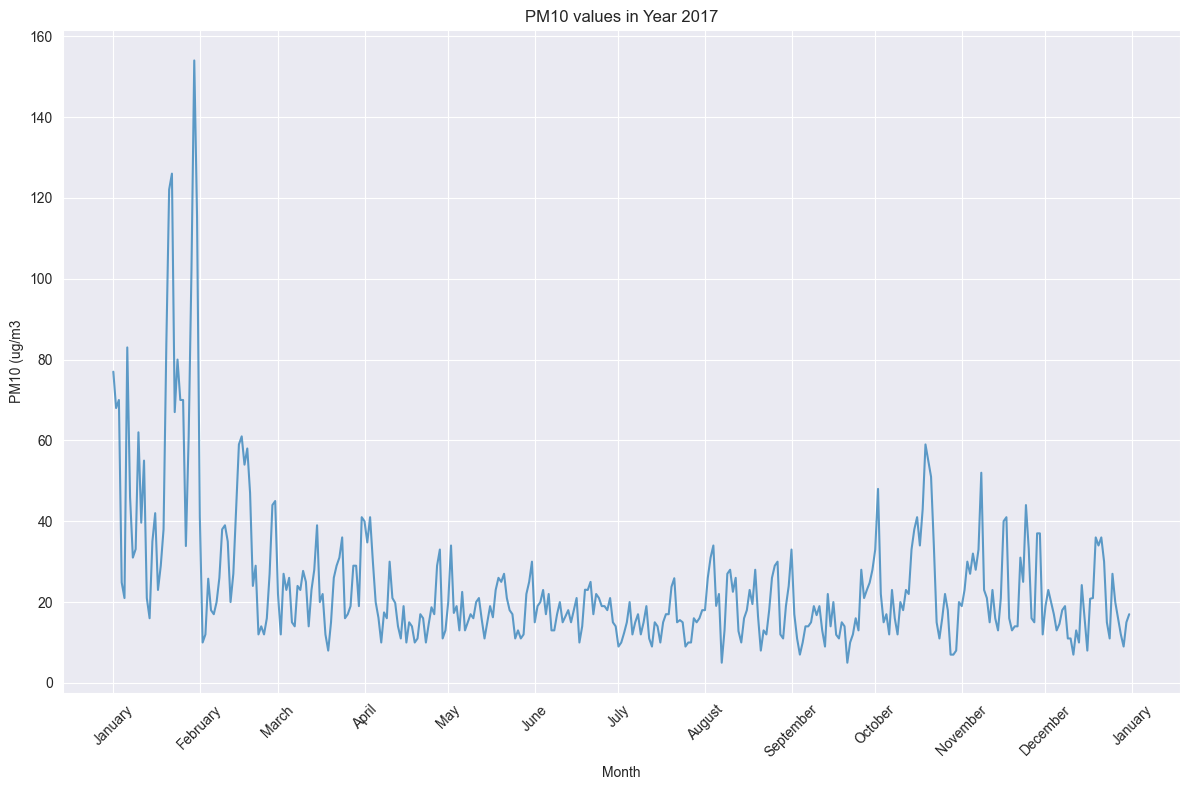

In [20]:
unique_years = df_imputed['Year'].unique()

for year in unique_years:
    plt.figure(figsize=(12, 8))
    plt.plot(df_imputed[df_imputed['Year']==year].index, df_imputed[df_imputed['Year']==year]['PM10'], alpha=0.7)
    plt.title(f"PM10 values in Year {year}")
    plt.xlabel("Month")
    plt.ylabel("PM10 (ug/m3")
    
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))
    
    plt.grid(True)
    plt.xticks(rotation=45) 
    plt.tight_layout()
    plt.show()

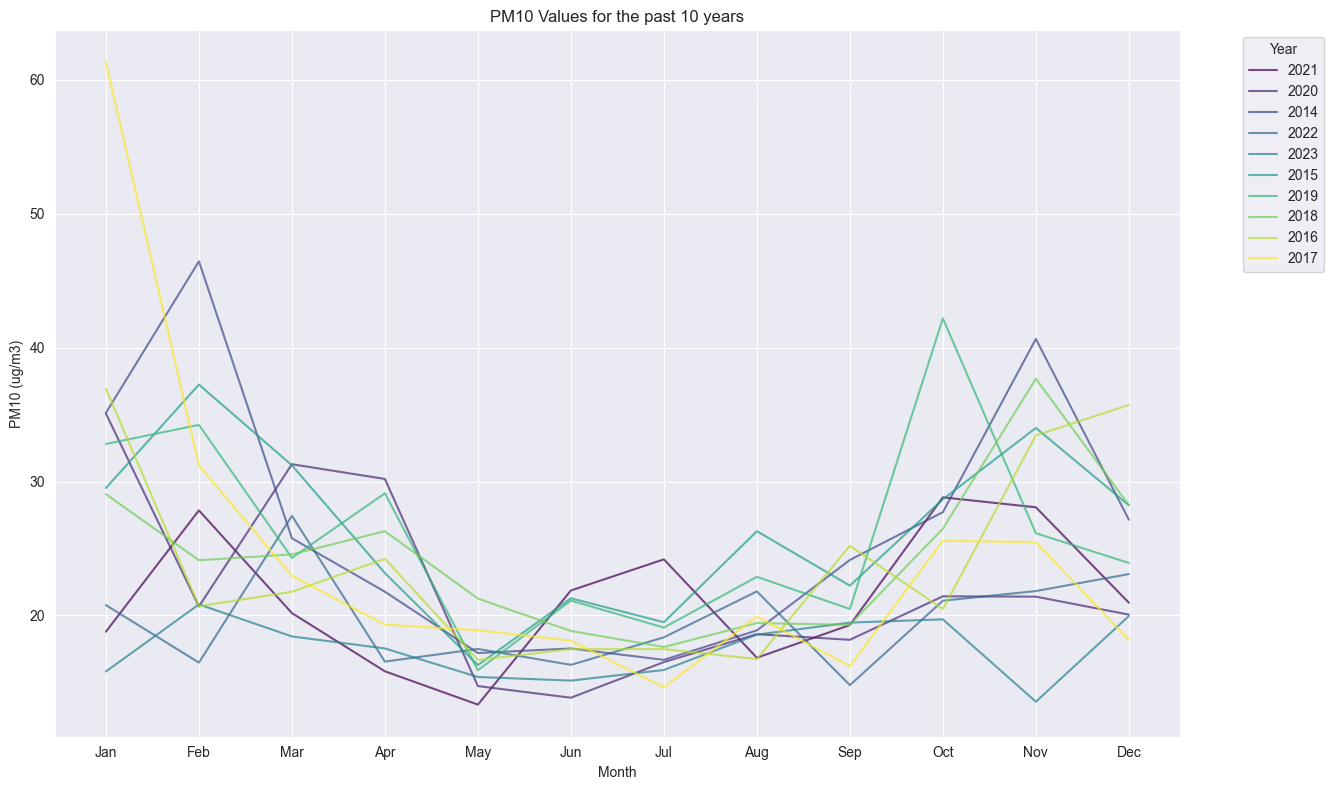

In [21]:
from matplotlib import cm

unique_years = df_imputed['Year'].unique()
months = np.arange(1, 13) 

plt.figure(figsize=(12, 8))

colors = cm.viridis(np.linspace(0, 1, len(unique_years)))

for i, year in enumerate(unique_years):
    monthly_data = df_imputed[df_imputed['Year'] == year].groupby('Month')['PM10'].mean()

    plt.plot(
        months, 
        monthly_data, 
        color=colors[i], 
        alpha=0.7, 
        label=f"{year}"
    )

plt.title("PM10 Values for the past 10 years")
plt.xlabel("Month")
plt.ylabel("PM10 (ug/m3)")

plt.xticks(months, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid(True)
plt.tight_layout()
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


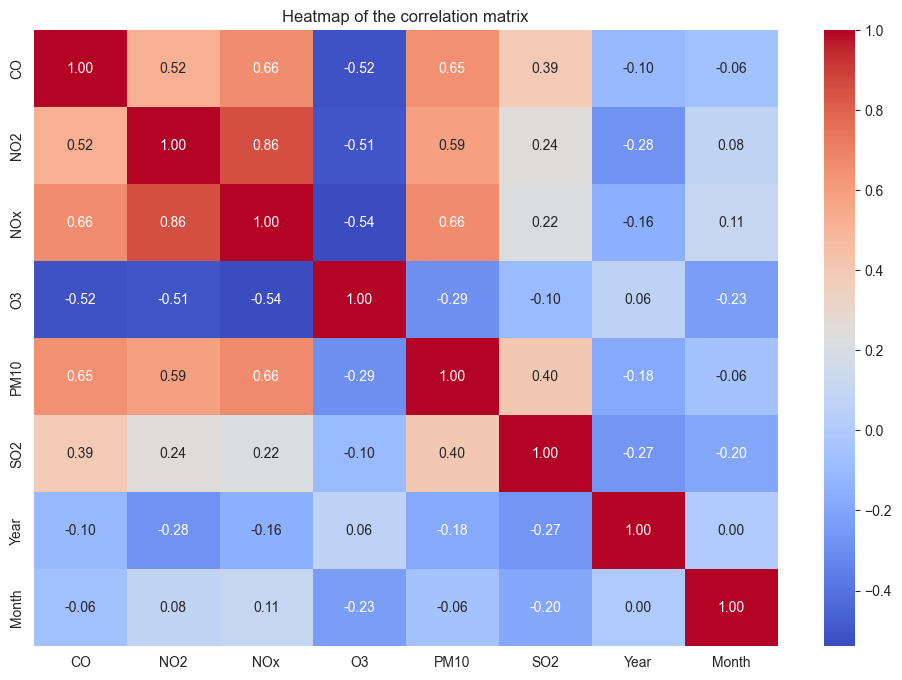

In [22]:
import seaborn as sns

corr_matrix = df_imputed[df_imputed.columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap of the correlation matrix")
plt.show()

In [23]:
df_copy = df_imputed.copy()
df_copy = df_copy.reset_index()
df_copy.index.name = 'ID'

In [24]:
pollutants = df_copy.columns
pollutants

Index(['Date', 'CO', 'NO2', 'NOx', 'O3', 'PM10', 'SO2', 'Year', 'Month'], dtype='object')

In [25]:
from sklearn.ensemble import IsolationForest

anomaly_result = {}
normal_data_frames = []

pollutants = df_copy.columns

n_estimators = 100
contamination = 0.01
sample_size = 256

for polt in pollutants:
    df_anom = df_copy.copy()
    iso_forest = IsolationForest(n_estimators=n_estimators, contamination=contamination, max_samples=sample_size, random_state=42)
    iso_forest.fit(df_copy[[polt]])
    
    df_anom[f'{polt}_anomaly_scores'] = iso_forest.decision_function(df_copy[[polt]])
    df_anom[f'{polt}_anomaly'] = iso_forest.predict(df_copy[[polt]])

    anomaly_result[polt] = df_anom[[f'{polt}_anomaly_scores', f'{polt}_anomaly']]
    
    print(f"{polt} Anomalies:")
    print(df_anom[f'{polt}_anomaly'].value_counts())
    print("\n")
    
    df_normal = df_anom[df_anom[f'{polt}_anomaly'] == 1]



Date Anomalies:
Date_anomaly
 1    3615
-1      37
Name: count, dtype: int64


CO Anomalies:
CO_anomaly
 1    3615
-1      37
Name: count, dtype: int64


NO2 Anomalies:
NO2_anomaly
 1    3615
-1      37
Name: count, dtype: int64


NOx Anomalies:
NOx_anomaly
 1    3615
-1      37
Name: count, dtype: int64


O3 Anomalies:
O3_anomaly
 1    3615
-1      37
Name: count, dtype: int64


PM10 Anomalies:
PM10_anomaly
 1    3615
-1      37
Name: count, dtype: int64


SO2 Anomalies:
SO2_anomaly
 1    3616
-1      36
Name: count, dtype: int64


Year Anomalies:
Year_anomaly
1    3652
Name: count, dtype: int64


Month Anomalies:
Month_anomaly
1    3652
Name: count, dtype: int64




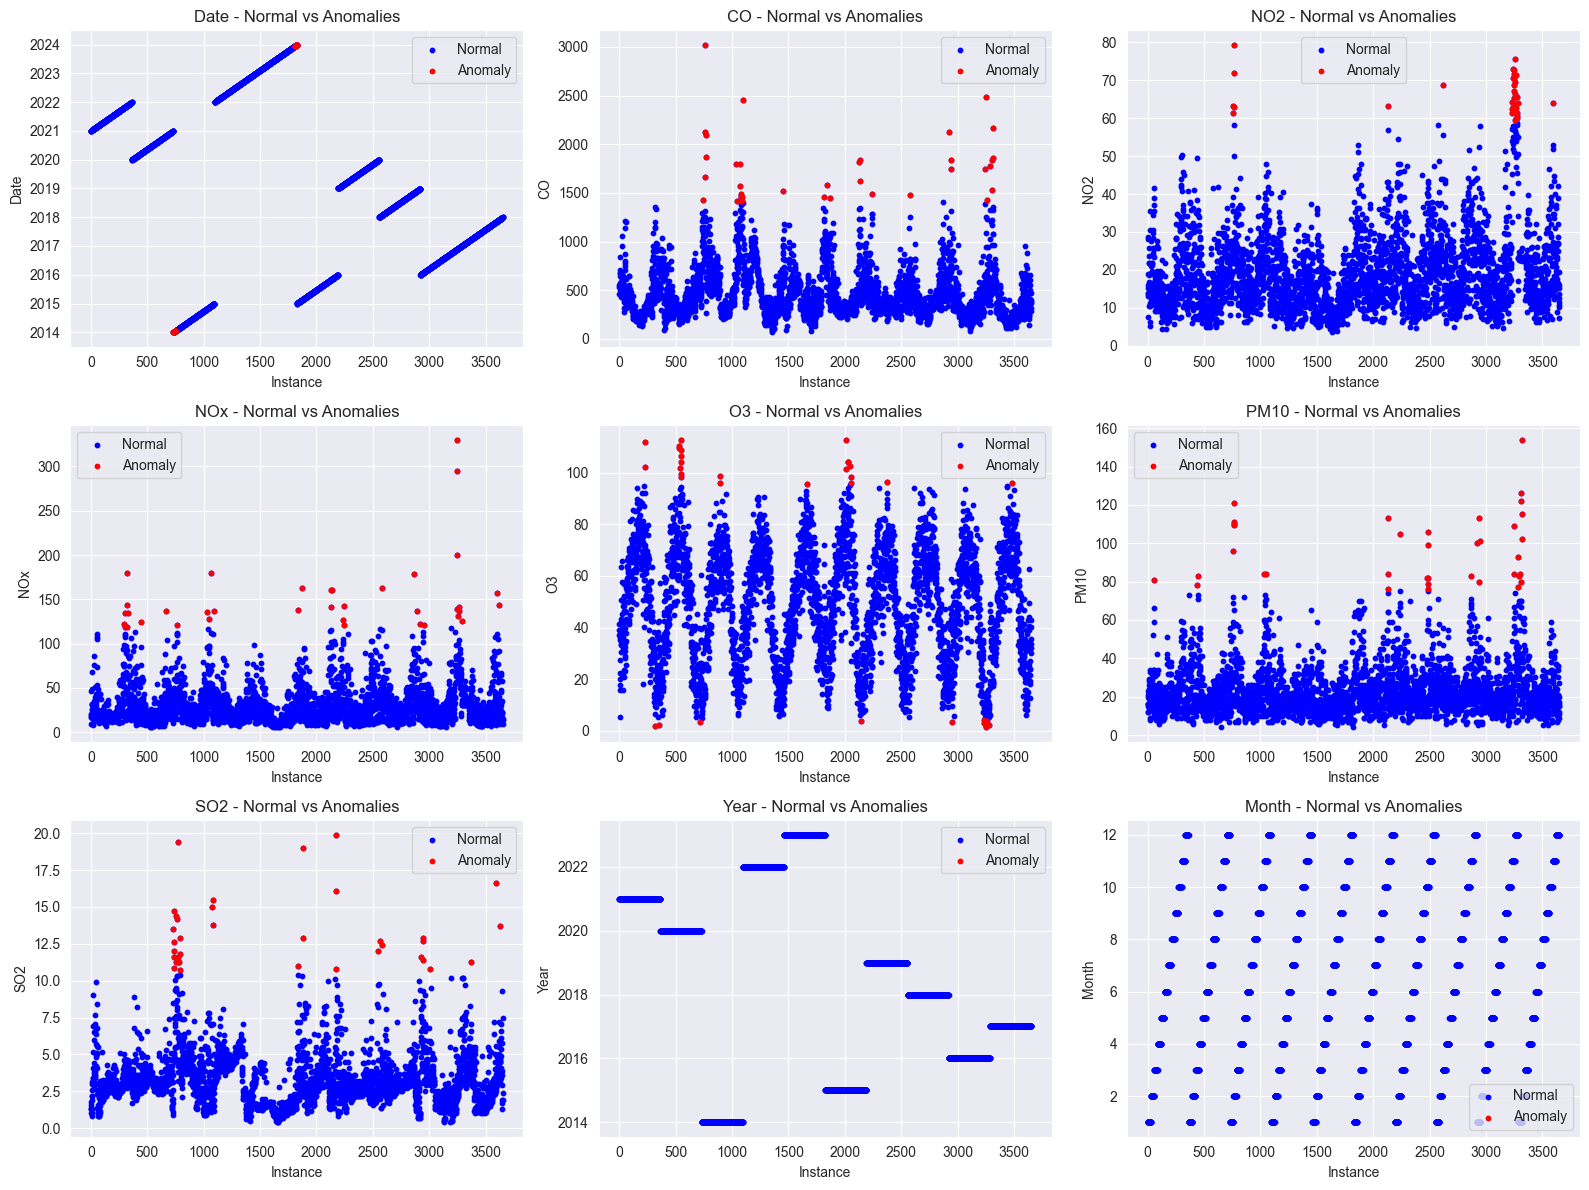

In [26]:
import math

plt.figure(figsize=(16, 12))

num_pollutants = len(pollutants)
cols = 3  
rows = math.ceil(num_pollutants / cols)  


for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(rows, cols, i)
    
    original_values = df_copy[pollutant]
    result = anomaly_result[pollutant]
    
    normal_indices = result[result[f'{pollutant}_anomaly'] == 1].index
    anomaly_indices = result[result[f'{pollutant}_anomaly'] == -1].index
    
    plt.scatter(df_copy.index, original_values, label='Normal', color='blue', s=10)
    
    plt.scatter(anomaly_indices, df_copy.loc[anomaly_indices, pollutant], label='Anomaly', color='red', s=10)

    plt.xlabel("Instance")
    plt.ylabel(pollutant)
    plt.title(f"{pollutant} - Normal vs Anomalies")
    plt.legend()

plt.tight_layout()
plt.show()

In [27]:
df_normal

,Date,CO,NO2,NOx,O3,PM10,SO2,Year,Month,Month_anomaly_scores,Month_anomaly
ID,,,,,,,,,,,
0,2021-01-01,459.0,7.5,9.9,41.2,12.0,1.3,2021,1,0.000000,1
1,2021-01-02,535.0,15.2,19.5,37.1,16.0,1.6,2021,1,0.000000,1
2,2021-01-03,551.0,13.7,17.0,38.9,16.0,1.4,2021,1,0.000000,1
3,2021-01-04,649.0,28.2,46.6,17.8,20.0,1.3,2021,1,0.000000,1
4,2021-01-05,504.0,13.0,16.9,35.3,12.0,1.0,2021,1,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
3647,2017-12-27,396.0,12.6,15.5,43.1,16.0,9.3,2017,12,0.002075,1
3648,2017-12-28,323.0,19.3,23.4,40.1,12.0,3.9,2017,12,0.002075,1
3649,2017-12-29,289.0,10.1,14.2,33.8,9.0,1.9,2017,12,0.002075,1


In [28]:
df_normal

,Date,CO,NO2,NOx,O3,PM10,SO2,Year,Month,Month_anomaly_scores,Month_anomaly
ID,,,,,,,,,,,
0,2021-01-01,459.0,7.5,9.9,41.2,12.0,1.3,2021,1,0.000000,1
1,2021-01-02,535.0,15.2,19.5,37.1,16.0,1.6,2021,1,0.000000,1
2,2021-01-03,551.0,13.7,17.0,38.9,16.0,1.4,2021,1,0.000000,1
3,2021-01-04,649.0,28.2,46.6,17.8,20.0,1.3,2021,1,0.000000,1
4,2021-01-05,504.0,13.0,16.9,35.3,12.0,1.0,2021,1,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
3647,2017-12-27,396.0,12.6,15.5,43.1,16.0,9.3,2017,12,0.002075,1
3648,2017-12-28,323.0,19.3,23.4,40.1,12.0,3.9,2017,12,0.002075,1
3649,2017-12-29,289.0,10.1,14.2,33.8,9.0,1.9,2017,12,0.002075,1


In [29]:
df_normal.to_csv("normalized_deb_trainstation_day.csv")